In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RAND = 10

# Импорт данных

In [75]:
df_items = pd.read_csv('C:/Users/Oktyabrina/Desktop/webscraper/data/product.csv')
df_items = df_items.drop(['nmFeedbacks','rating','root','optionId'], axis=1)
df_review = pd.read_csv('C:/Users/Oktyabrina/Desktop/webscraper/data/review.csv')
df_review = df_review.merge(df_items, left_on='Артикул', right_on='id')
df_review = df_review.drop(['id'], axis=1)

In [76]:
df_review = df_review.rename(columns={'brand':'Бренд','name':'Наименование','feedbacks':'Кол-во оценок',
                                      'reviewRating':'Общая оценка товара','basic':'Текущая цена до скидки','product':'Текущая цена после скидки',})
df_review.head(5)

,Автор,Статус заказа,Дата отзыва,Кол-во звезд,Текст отзыва,Артикул,Бренд,Наименование,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки
0,Покупатель Wildberries,NaN,NaN,star5,"Кошки едят хорошо, даже привереда",156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0
1,Надежда,Выкупили,"Сегодня, 17:47",star5,Недостатки:Т,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0
2,Юрий,Выкупили,"Сегодня, 17:46",star5,Плюсы товаракачествонравится животнымудобно по...,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0
3,Анатолий,Выкупили,"Сегодня, 16:53",star5,Плюсы товаранравится животным,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0
4,Валентина,Выкупили,"Сегодня, 15:26",star5,Плюсы товаранравится животным,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0


**Дату отзывов необходимо преобразовать в нормальную дату**

На сайте Вайлдбериз у отзывов, которые были оставлены вчера-сегодня, вместо даты пишут "Вчера" или "Сегодня"

In [77]:
date_dict = {
    'Сегодня': '15 сентября',
    'Вчера': '14 сентября'
}

for old_value,new_value in date_dict.items():
    df_review['Дата отзыва']=df_review['Дата отзыва'].str.replace(old_value,new_value, regex=True)


In [78]:
df_review[['date_temp','time']] = df_review['Дата отзыва'].str.replace(' · Дополнен','').str.split(',', expand=True)
df_review[['day','month','year']]=df_review['date_temp'].str.split(expand=True)
df_review['year']=df_review['year'].fillna('2025')

Названия месяцев написаны на русском со склонением. Необходимо вместо них подставить номер месяца

In [79]:
month_dict = {'января':'01',
              'февраля':'02',
              'марта':'03',
              'апреля':'04',
              'мая':'05',
              'июня':'06',
              'июля':'07',
              'августа':'08',
              'сентября':'09',
              'октября':'10',
              'ноября':'11',
              'декабря':'12'}
for old_value,new_value in month_dict.items():
    df_review['month']=df_review['month'].str.replace(old_value,new_value, regex=False)

df_review['Дата'] = pd.to_datetime(
    df_review['day']+'.'+df_review['month']+'.'+df_review['year']+df_review['time'],
    format="%d.%m.%Y %H:%M"
)

In [80]:
df_review.head(5)

,Автор,Статус заказа,Дата отзыва,Кол-во звезд,Текст отзыва,Артикул,Бренд,Наименование,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки,date_temp,time,day,month,year,Дата
0,Покупатель Wildberries,NaN,NaN,star5,"Кошки едят хорошо, даже привереда",156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0,NaN,NaN,NaN,NaN,2025,NaT
1,Надежда,Выкупили,"15 сентября, 17:47",star5,Недостатки:Т,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0,15 сентября,17:47,15,09,2025,2025-09-15 17:47:00
2,Юрий,Выкупили,"15 сентября, 17:46",star5,Плюсы товаракачествонравится животнымудобно по...,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0,15 сентября,17:46,15,09,2025,2025-09-15 17:46:00
3,Анатолий,Выкупили,"15 сентября, 16:53",star5,Плюсы товаранравится животным,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0,15 сентября,16:53,15,09,2025,2025-09-15 16:53:00
4,Валентина,Выкупили,"15 сентября, 15:26",star5,Плюсы товаранравится животным,156278877.0,FELIX,Сухой корм для кошек с мясом 3 кг,16850,5.0,1295.0,854.0,15 сентября,15:26,15,09,2025,2025-09-15 15:26:00


Необходимо удалить все лишние столбцы с датами отзыва и оставить только обработанный и преобразованный в datetime формат

In [81]:
df_review = df_review.drop(['Дата отзыва','date_temp','time','day','month','year'], axis=1)

Из столбца Кол-во звезд удаляем слово star, чтобы в столбце остались только числовые значения

In [82]:
df_review['Кол-во звезд']=df_review['Кол-во звезд'].str.replace('star','')

Кол-во пустых значений в столбцах

In [83]:
df_review.isna().sum()

Автор                            0
Статус заказа                14771
Кол-во звезд                     0
Текст отзыва                    90
Артикул                          0
Бренд                            0
Наименование                     0
Кол-во оценок                    0
Общая оценка товара              0
Текущая цена до скидки           0
Текущая цена после скидки        0
Дата                            55
dtype: int64

У столбца Статус заказа очень много пустых значения, пустые ячейки заполняем значением Неизвестно


In [84]:
df_review['Статус заказа']=df_review['Статус заказа'].fillna('Неизвестно')

В столбце Текст отзыва тоже есть пустые значения, необходимо заполнить значение Пусто

In [85]:
df_review['Текст отзыва']=df_review['Текст отзыва'].fillna('Пусто')

У закрепленных отзывов отсутствуют даты. Заполним их медианами

In [86]:
df_review['Дата']=df_review.groupby('Артикул')['Дата'].transform(
    lambda x: x.fillna(x.median())
)

Необходимо у столбца Кол-во звезд задать числовой тип

In [87]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44933 entries, 0 to 44932
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Автор                      44933 non-null  object        
 1   Статус заказа              44933 non-null  object        
 2   Кол-во звезд               44933 non-null  object        
 3   Текст отзыва               44933 non-null  object        
 4   Артикул                    44933 non-null  float64       
 5   Бренд                      44933 non-null  object        
 6   Наименование               44933 non-null  object        
 7   Кол-во оценок              44933 non-null  int64         
 8   Общая оценка товара        44933 non-null  float64       
 9   Текущая цена до скидки     44933 non-null  float64       
 10  Текущая цена после скидки  44933 non-null  float64       
 11  Дата                       44933 non-null  datetime64[ns]
dtypes: d

In [88]:
print(f"Уникальные значения столбца Кол-во звезд: {df_review['Кол-во звезд'].unique()}")

Уникальные значения столбца Кол-во звезд: ['5' '3' '1' '4' '2']


In [89]:
df_review=df_review.astype({'Кол-во звезд': int
                            })

Размер датасета

In [90]:
df_review.shape

(44933, 12)

У столбца автор очень мало уникальных значений. У даты скорее всего из-за времени

In [91]:
df_review.nunique()

Автор                         2623
Статус заказа                    4
Кол-во звезд                     5
Текст отзыва                 33431
Артикул                        196
Бренд                           59
Наименование                   180
Кол-во оценок                  185
Общая оценка товара              8
Текущая цена до скидки         151
Текущая цена после скидки      153
Дата                         42387
dtype: int64

Очень много анонимных отзывов

In [92]:
df_review['Автор'].value_counts(ascending=True)

Автор
Стэйша                       1
Мария Семерьянова            1
Трофимова Ирина              1
 Жанна                       1
Парфенюк Елена               1
                          ... 
Ольга                     2349
Наталья                   2493
Татьяна                   2507
Елена                     3224
Покупатель Wildberries    4990
Name: count, Length: 2623, dtype: int64

Если при расчете кол-ва уникальных значений столбца Дата смотреть только на дату, то кол-во будет меньше

In [93]:
df_review['Дата'].dt.date.nunique()

1380

Основная описательная статистика
Для просмотра числовых данных, надо исключить Артикул

In [94]:
df_review.loc[:,df_review.columns!='Артикул'].describe()

,Кол-во звезд,Кол-во оценок,Общая оценка товара,Текущая цена до скидки,Текущая цена после скидки,Дата
count,44933.000000,44933.00000,44933.000000,44933.000000,44933.000000,44933
mean,4.696326,3409.38070,4.896495,2057.461509,956.862017,2024-12-12 12:42:58.796207616
min,1.000000,4.00000,4.300000,140.000000,125.000000,2020-10-11 21:14:00
25%,5.000000,1221.00000,4.900000,934.000000,571.000000,2024-07-17 14:44:00
50%,5.000000,2227.00000,4.900000,1509.000000,896.000000,2025-03-28 17:03:00
75%,5.000000,4997.00000,4.900000,2335.000000,1234.000000,2025-07-24 19:15:00
max,5.000000,16850.00000,5.000000,14472.000000,3092.000000,2025-09-15 21:24:00
std,0.884516,3255.78804,0.082815,2041.314463,506.429305,NaN


- Нет выбросов. Лушче Кол-во звезд и дату смотреть как нечисловые данные

Оценка 5 чаще всего встречается

In [95]:
df_review['Кол-во звезд'].astype(str).describe()

count     44933
unique        5
top           5
freq      38898
Name: Кол-во звезд, dtype: object

14 сентября 2025 было больше всего отзывов

In [96]:
df_review['Дата'].dt.date.describe()

count          44933
unique          1380
top       2025-09-14
freq             380
Name: Дата, dtype: object

c:\Users\Oktyabrina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


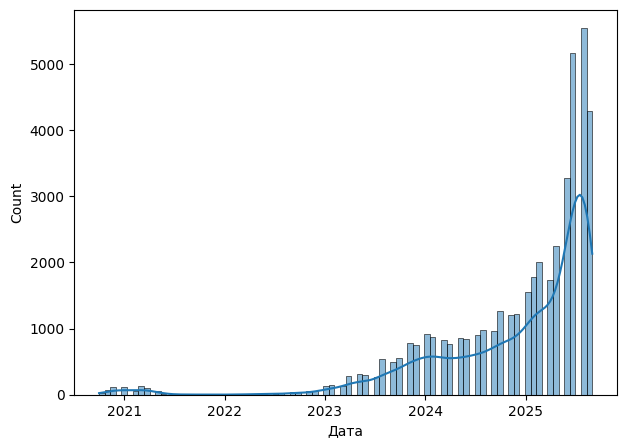

In [113]:
plt.figure(figsize=(7,5))
sns.histplot(x=df_review['Дата'].dt.to_period('M').dt.to_timestamp(), kde=True)
plt.show()

Много анонимных отзывов. Чаще всего отзывы оставляют покупатели, которые выкупили товар. Бренд Мираторг встречается чаще всего

In [114]:
df_review.describe(include=["object", "bool"])

,Автор,Статус заказа,Текст отзыва,Бренд,Наименование
count,44933,44933,44933,44933,44933
unique,2623,4,33431,59,180
top,Покупатель Wildberries,Выкупили,Плюсы товарапонравилось питомцу,Мираторг,Сухой корм для кошек с чувствительным пищеваре...
freq,4990,30139,3302,6339,1075


# EDA

Гипотезы:
1. Чем выше оценка, тем чаще в отзыве чаще встречаются слова "хорошо" "отлично"
2. Чем ниже оценка, тем чаще в отзыве чаще встречаются слова "плохо" "ужасно"


Гипотеза 1. Чем выше оценка, тем чаще в отзыве чаще встречаются слова "хорошо" "отлично"

In [116]:
df_review['Текст отзыва']=df_review['Текст отзыва'].str.lower()
df_review['Have_positive_words'] = df_review['Текст отзыва'].str.contains("хорош|отличн", regex=True)

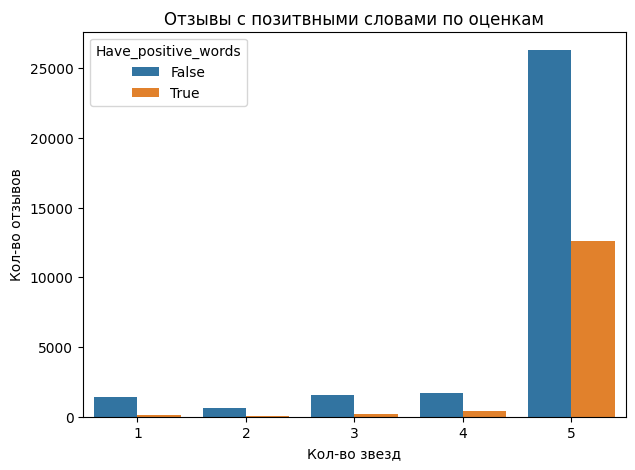

In [117]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_review, x='Кол-во звезд', hue='Have_positive_words')
plt.ylabel('Кол-во отзывов')
plt.title('Отзывы с позитвными словами по оценкам')
plt.show()

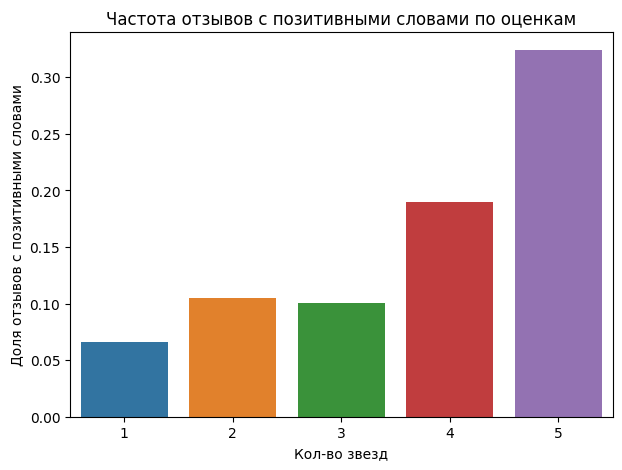

In [118]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_review, x='Кол-во звезд', y='Have_positive_words', estimator='mean', errorbar=None
)
plt.ylabel('Доля отзывов с позитивными словами')
plt.title('Частота отзывов с позитивными словами по оценкам')
plt.show()

- по графикам видно, что отзывы со словами "хорошо" или "отлично" встречаются чаще всего у отзывов с высокой оценкой

Гипотеза 2. Чем ниже оценка, тем чаще в отзыве чаще встречаются слова "плохо" "ужасно"

In [119]:
df_review['Have_negative_words'] = df_review['Текст отзыва'].str.contains("плох|ужасн", regex=True)

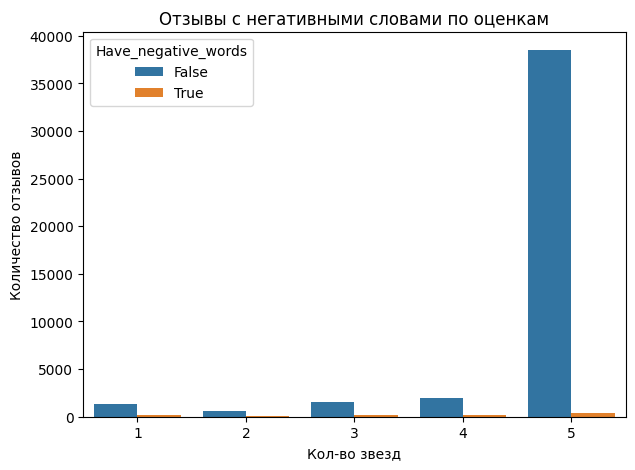

In [120]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_review, x='Кол-во звезд', hue='Have_negative_words')
plt.ylabel('Количество отзывов')
plt.title('Отзывы с негативными словами по оценкам')
plt.show()

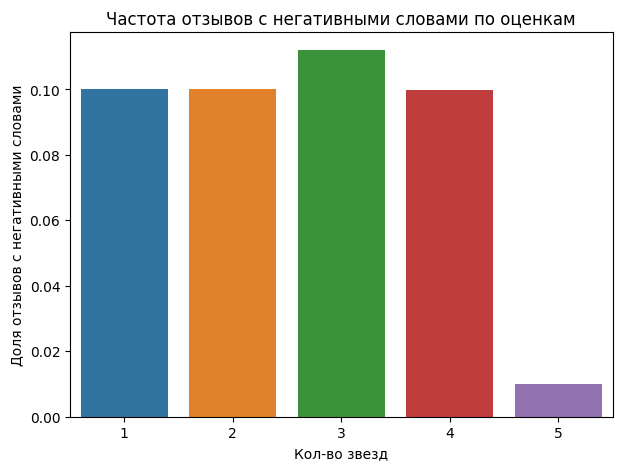

In [121]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_review, x='Кол-во звезд', y='Have_negative_words', estimator='mean', errorbar=None
)
plt.ylabel('Доля отзывов с негативными словами')
plt.title('Частота отзывов с негативными словами по оценкам')
plt.show()

- Гипотеза о том, что в отзывах с низкой оценкой чаще встречаются негативные слова - не подтвердилась